# Image Classification
## 1. Load & Preprocess Data
1.1 rescale image

1.2 rotate, shift, shear, zoom and flip

1.3 Resize all images into 150 x 150

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import path

BASE_DIR = './'

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    path.join(BASE_DIR, 'training'),
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    path.join(BASE_DIR, 'testing'),
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## 2. Build Deep Learning Model

In [2]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## 3. Train, and Validate the Model

In [3]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

C:\Users\MoRiK\AppData\Local\Temp\ipykernel_28608\2972168915.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data = validation_generator, verbose = 1)


Epoch 1/5
79/79 [==============================] - 38s 480ms/step - loss: 1.1574 - accuracy: 0.3496 - val_loss: 1.0730 - val_accuracy: 0.6022
Epoch 2/5
79/79 [==============================] - 30s 383ms/step - loss: 0.9364 - accuracy: 0.5417 - val_loss: 0.3536 - val_accuracy: 0.9516
Epoch 3/5
79/79 [==============================] - 31s 387ms/step - loss: 0.5989 - accuracy: 0.7433 - val_loss: 0.3093 - val_accuracy: 0.8575
Epoch 4/5
79/79 [==============================] - 31s 387ms/step - loss: 0.3762 - accuracy: 0.8429 - val_loss: 0.2539 - val_accuracy: 0.8387
Epoch 5/5
79/79 [==============================] - 31s 389ms/step - loss: 0.2868 - accuracy: 0.8940 - val_loss: 0.3652 - val_accuracy: 0.8575


## 4. Plot Accuracy and Loss / Epochs

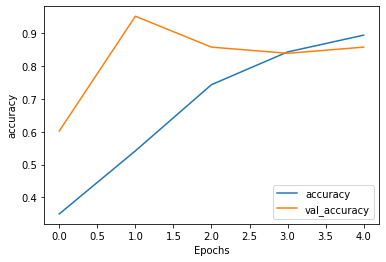

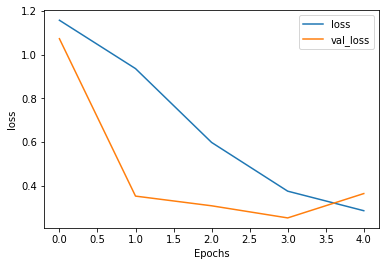

In [4]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 5. Test and Try

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(path.join(BASE_DIR, 'testing/rock/testrock03-22.png'), target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

1/1 [==============================] - 0s 16ms/step
[[0. 1. 0.]]


In [15]:
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [12]:
model.predict(images)

1/1 [==============================] - 0s 15ms/step


array([[0., 1., 0.]], dtype=float32)